In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
import matplotlib.image as mpimg
%matplotlib notebook

<IPython.core.display.Javascript object>


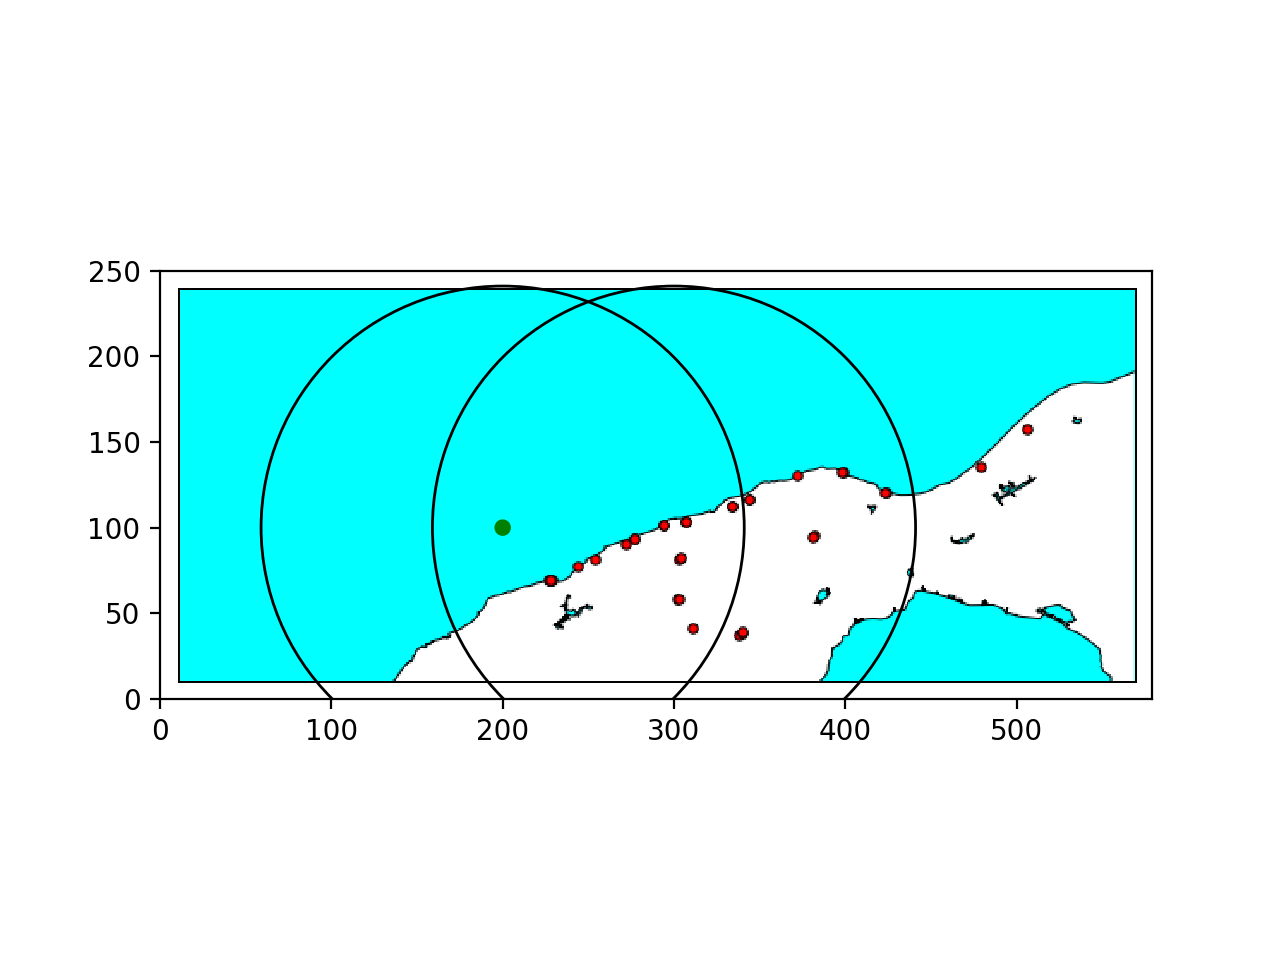

In [69]:

fig, ax = plt.subplots()

'''
m = Basemap(projection='mill',llcrnrlon=-110,llcrnrlat=12,urcrnrlat=20,urcrnrlon=-90,resolution='i')#lat_0=45,lon_0=45,height=200,width=200)#llcrnrlon=45,llcrnrlat=45,urcrnrlat=46,urcrnrlon=46)

m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='white',lake_color='aqua')
ax.scatter(m(lon,lat)[0],m(lon,lat)[1],s=30,c='red',zorder=10,edgecolor='black')
'''
img=mpimg.imread('sensors.png')

h,w,d=img.shape

ax.imshow(img)
ax.set_xlim(0,w)
ax.set_ylim(0,h)

#ax.plot(np.arange(w),np.arange(w))


# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
p1color=''
for i in range(200):
    
    x=plt.Circle((300,100),1*i,fill=False) 
    y=plt.Circle((200,100),1*i,fill=False)
    
    if i>100:
        p1color='green'
    else:
        p1color='red'
    p1=plt.Circle((200,100),4,color=p1color)
    #ax.add_artist(x)
    #ax.add_artist(y)
    #ax.add_artist(x)
    im=ax.add_artist(x)
    im2=ax.add_artist(y)
    im3=ax.add_artist(p1)
    #im3=plt.imshow(img)
    ims.append([im,im2,im3])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

#ani.save('dynamic_images.mp4')

#plt.show()